# Time Series Exploratory Analysis

## Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.ion()
import statsmodels.api as sm
from datetime import timedelta, datetime

import warnings
warnings.filterwarnings("ignore")

from acquire import combined_data, get_germany_power
from prepare import prep_combine, prep_opsd

Plotting defaults:

In [2]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

In [3]:
df = combined_data()
df.head(3)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df = prep_combine(df)

In [5]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday,8.40


In [6]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


### Percentage - Based

In [7]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

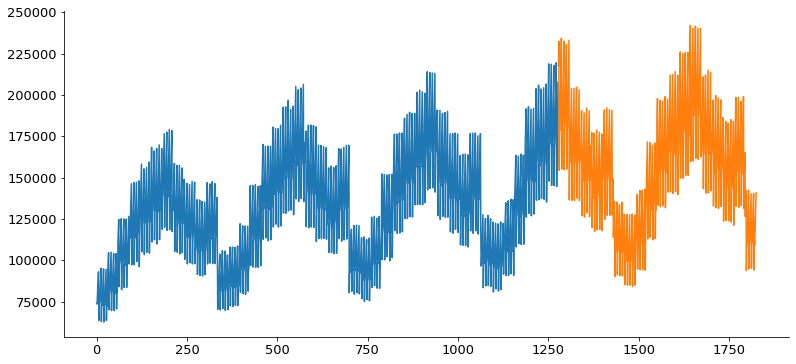

In [8]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [9]:
train = train.set_index('sale_date')

In [10]:
y=train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Name: sales_total, dtype: float64

### Histogram to show the distribution of our target variable 

<AxesSubplot:ylabel='Frequency'>

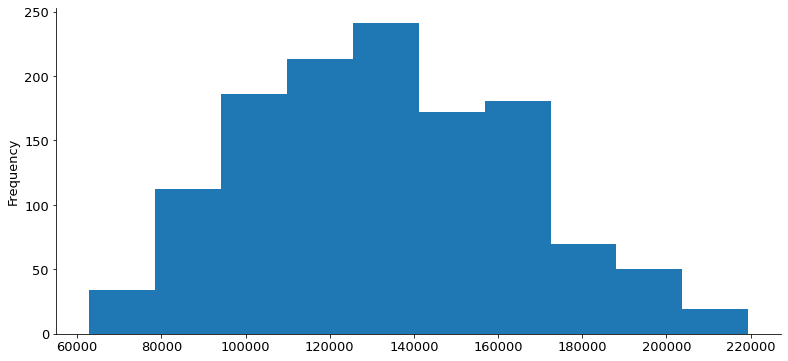

In [11]:
y.plot.hist()

### We could also treat components of the date as a seperate categorical feature

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'sales_total')]

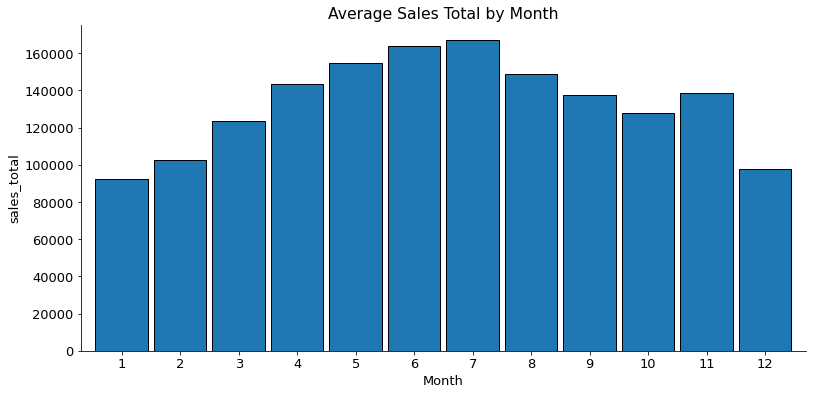

In [12]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='sales_total')

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 20.200000000000003, 'Month'),
 Text(20.200000000000003, 0.5, 'sales_total')]

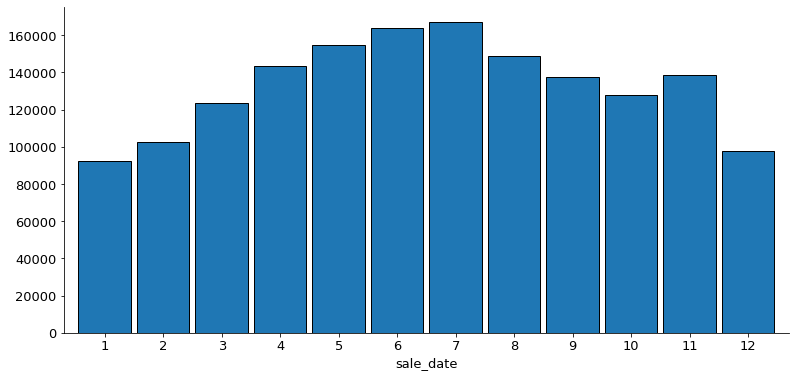

In [13]:
y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='sales_total')

In [14]:
#let's see sales total by month
train['month'] = train.index.month

<AxesSubplot:xlabel='month'>

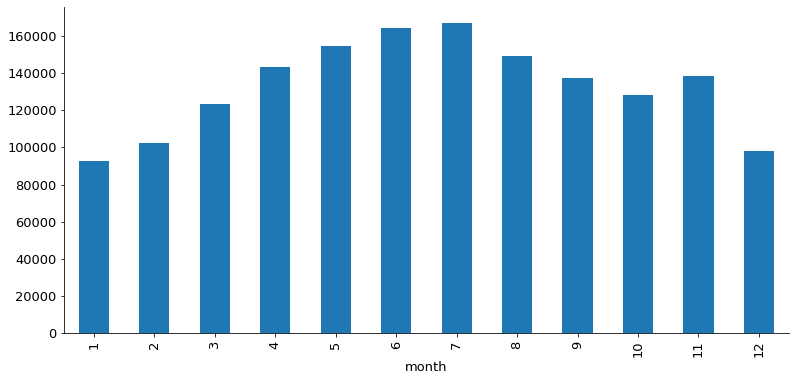

In [15]:

train.groupby('month').sales_total.mean().plot.bar()

In [16]:
#let's see sales total by weekday
train['weekday']=train.index.day_name()

<AxesSubplot:xlabel='weekday'>

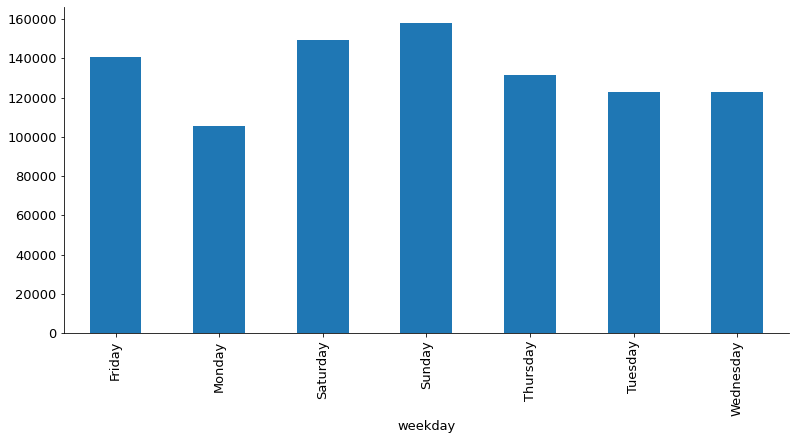

In [17]:
train.groupby('weekday').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

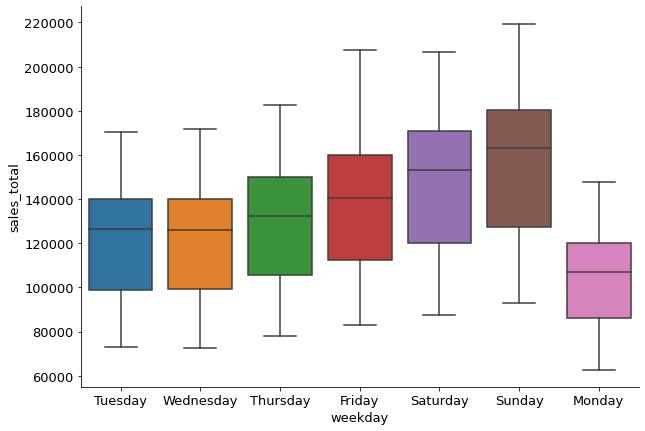

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='weekday',y='sales_total')

### Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

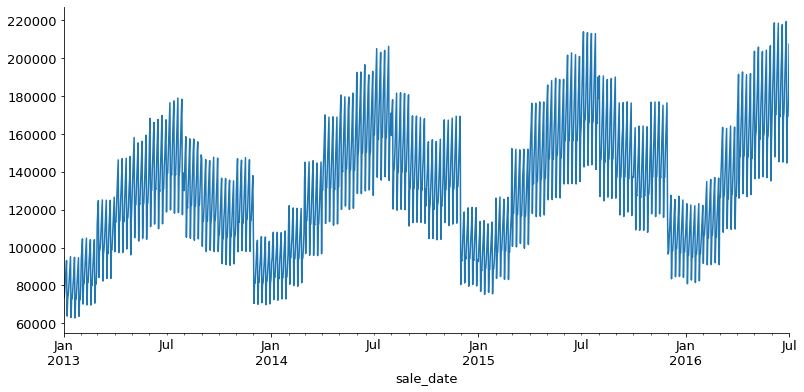

In [19]:
y.plot()

### We can also resample our target and visualize it over various time periods. We can combine these visualizations to see how the aggregating smoothes out the data.

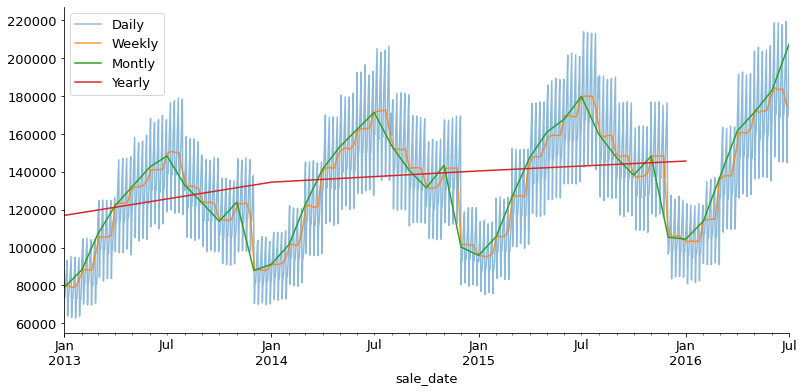

In [20]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### In addition to resampling, we can calculate moving averages with the .rolling method.

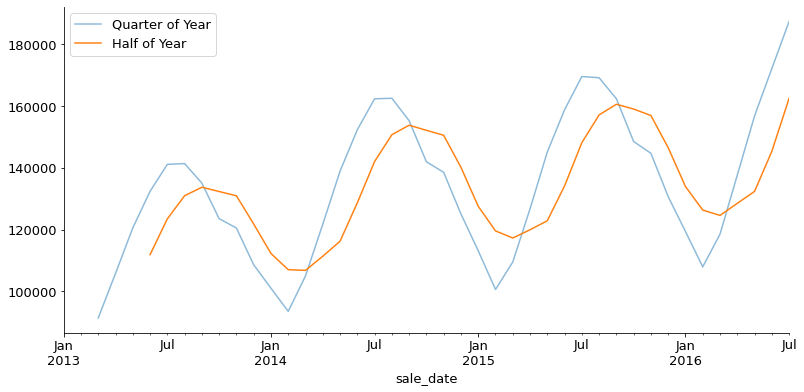

In [21]:
#y.plot(alpha=.4, label='Hourly')
y.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='Quarter of Year')
y.resample('M').mean().rolling(6).mean().plot(alpha=8, label='Half of Year')
plt.legend()

<AxesSubplot:title={'center':'Average Month Change in Total Sales'}, xlabel='sale_date'>

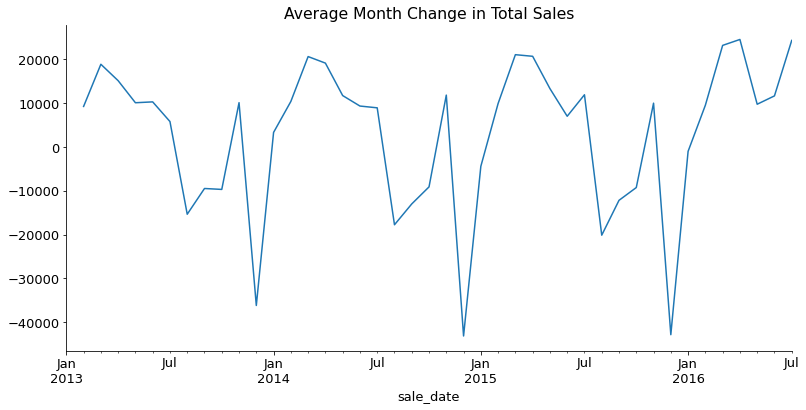

In [22]:
y.resample('M').mean().diff().plot(title='Average Month Change in Total Sales')

### Visualize change over time

<AxesSubplot:title={'center':'Average Weekly Change in Total Sales'}, xlabel='sale_date'>

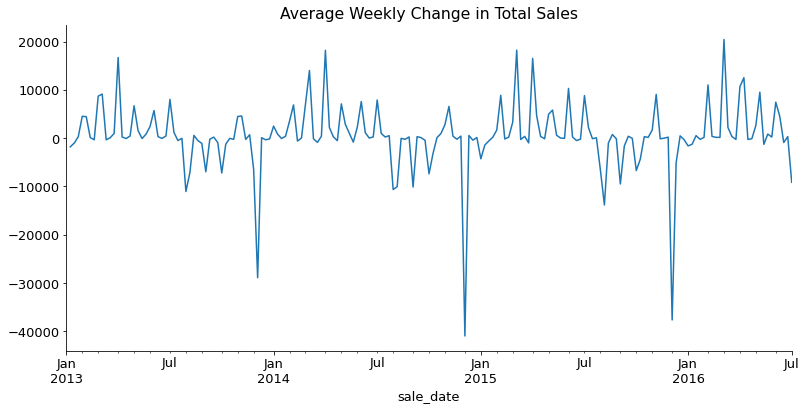

In [23]:
y.resample('W').mean().diff().plot(title='Average Weekly Change in Total Sales')

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

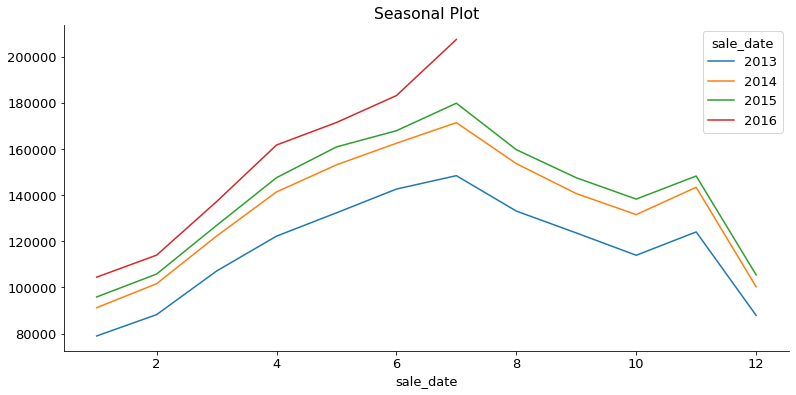

In [24]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

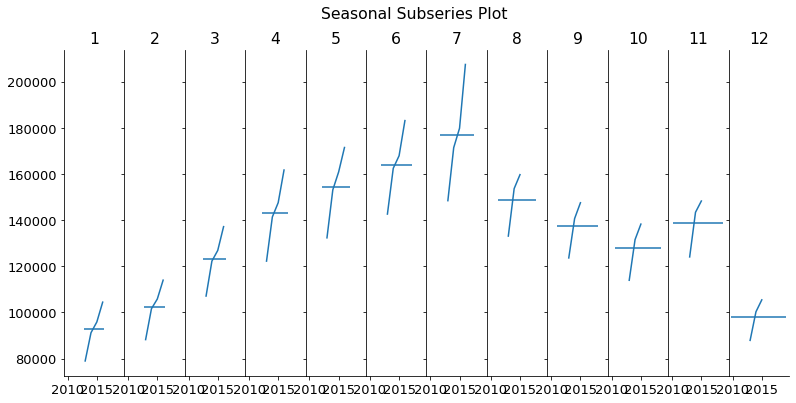

In [25]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Lag Plot
A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of 
t
 as 'today', 
t
+
1
 is 'tomorrow'. In reality, 
t
is any given time period and 
t
+
1
 is the time period after. If your data is sampled weekly, 
t
is any given week, and 
t
+
1
 is the following week.

In general, we will measure t, 
y
t
 on the x-axis against the next time step , 
y
t
+
1
, on the y-axis

Text(0.5, 1.0, 'Lag plot with lag=1')

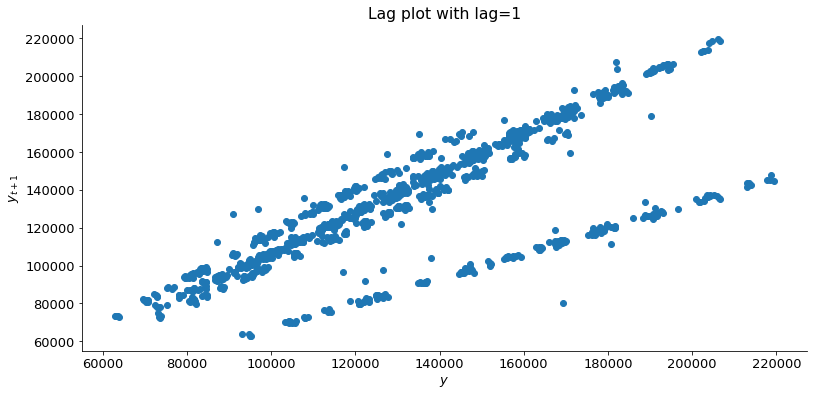

In [26]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

Text(0.5, 1.0, 'Lag plot with t + 1')

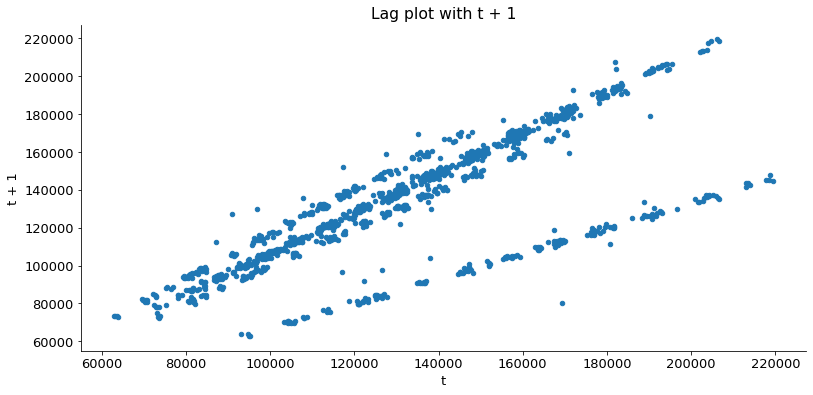

In [27]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')
plt.title('Lag plot with t + 1')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

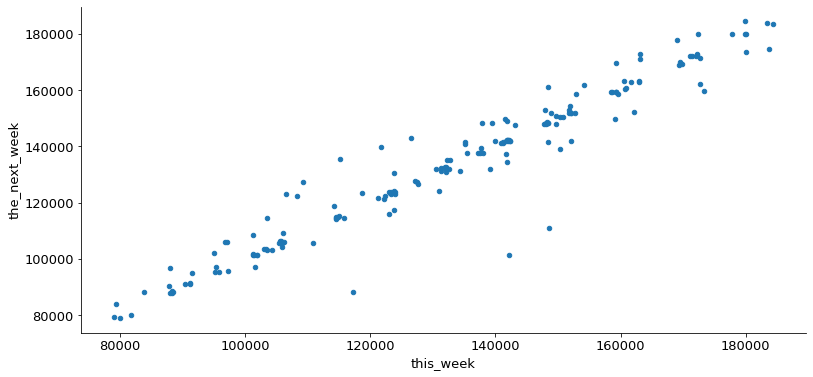

In [28]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

<AxesSubplot:xlabel='this_week', ylabel='half_a_year_later'>

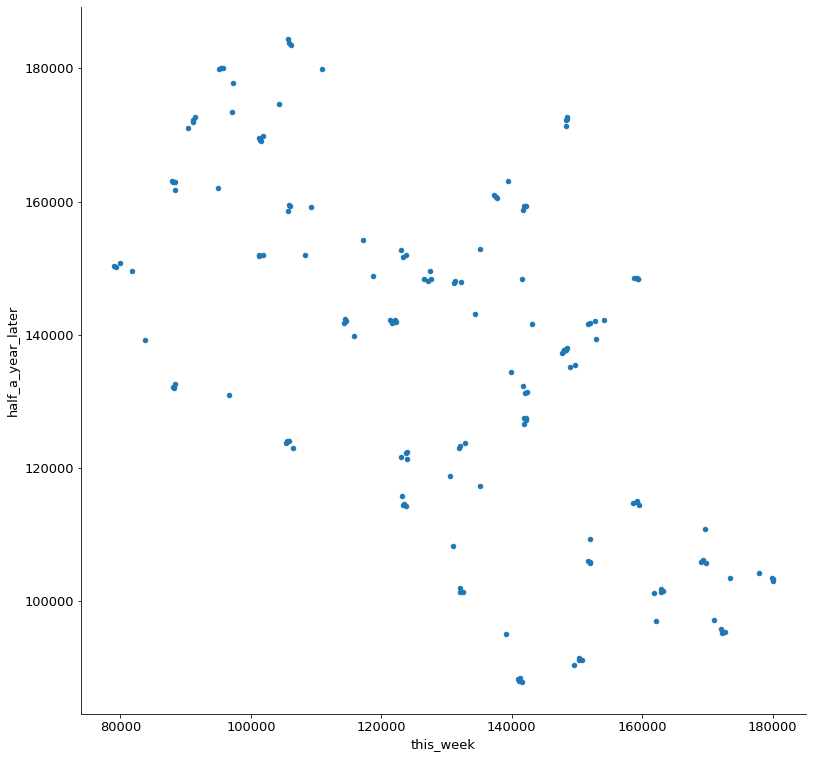

In [29]:
#let's look 6 months later
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

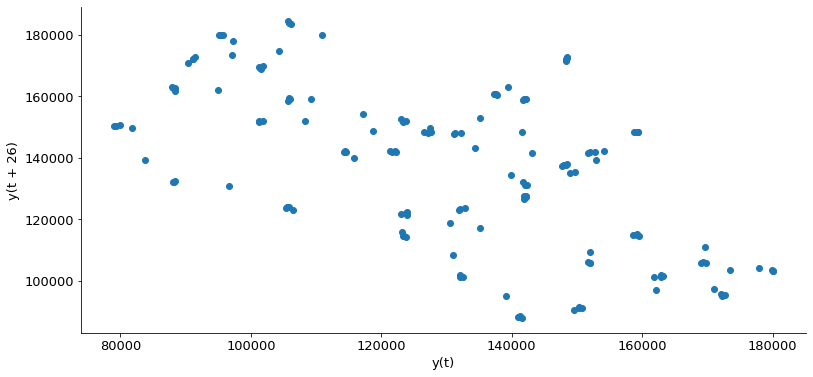

In [30]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

### Autocorrelation Plot

Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

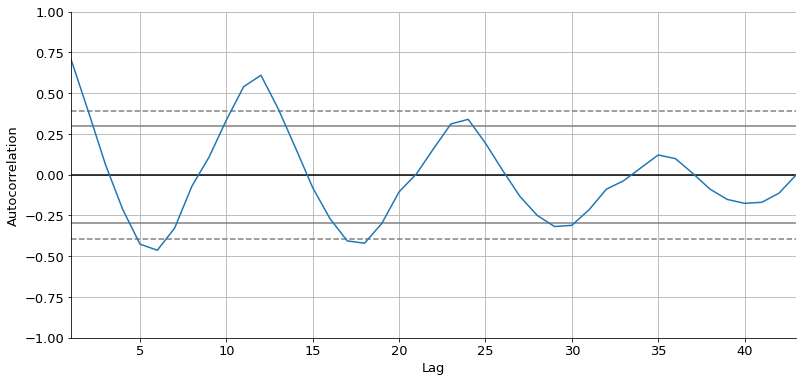

In [31]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())

### Seasonal Decomposition

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

In [32]:
y = train.sales_total.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-31 00:00:00+00:00,78947.361290,NaN,-39639.550997,NaN
2013-02-28 00:00:00+00:00,88205.927500,NaN,-29250.221824,NaN
2013-03-31 00:00:00+00:00,107090.825161,NaN,-9445.523172,NaN
2013-04-30 00:00:00+00:00,122230.041000,NaN,9475.026870,NaN
2013-05-31 00:00:00+00:00,132331.561290,NaN,20999.628955,NaN


<AxesSubplot:xlabel='sale_date'>

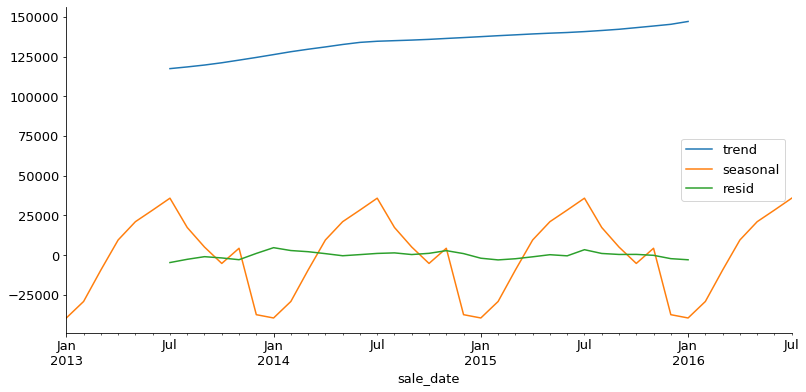

In [33]:
decomposition.iloc[:, 1:].plot()

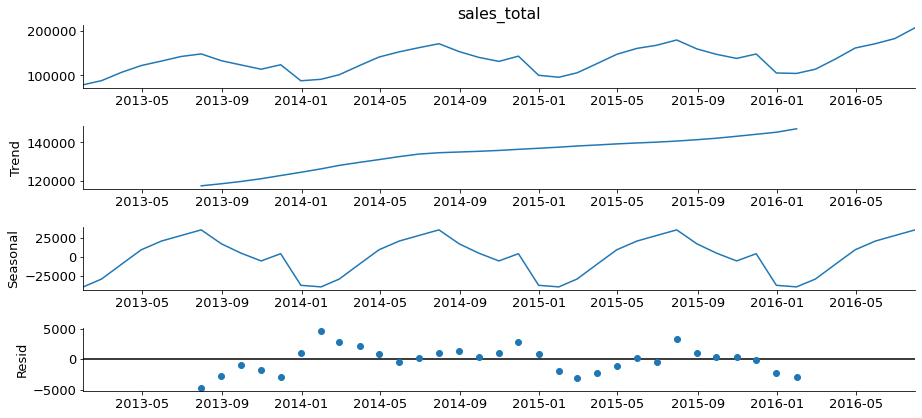

In [34]:
result.plot()
None

### Categories over time

How can we visualize categories over time? 

In [35]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low','medium','high'])
train.groupby('sales_bin').mean()

,sales_total,month,y(t + 1)
sales_bin,,,
low,97828.398052,5.117371,103999.461150
medium,131801.070376,6.615023,134940.205915
high,168858.169554,6.553991,159749.627294


Text(0, 0.5, '% of days in the month')

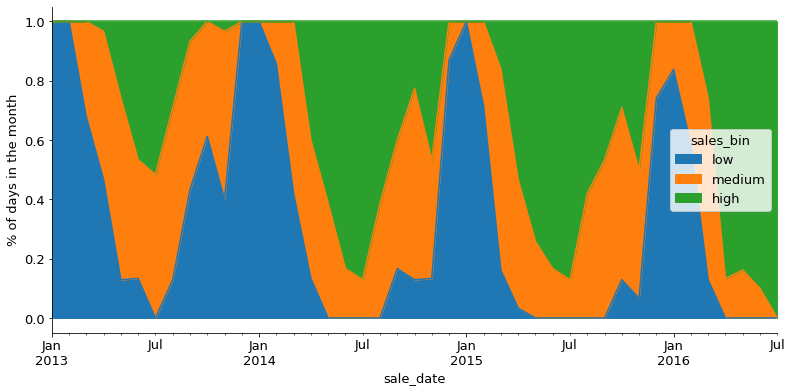

In [36]:

(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

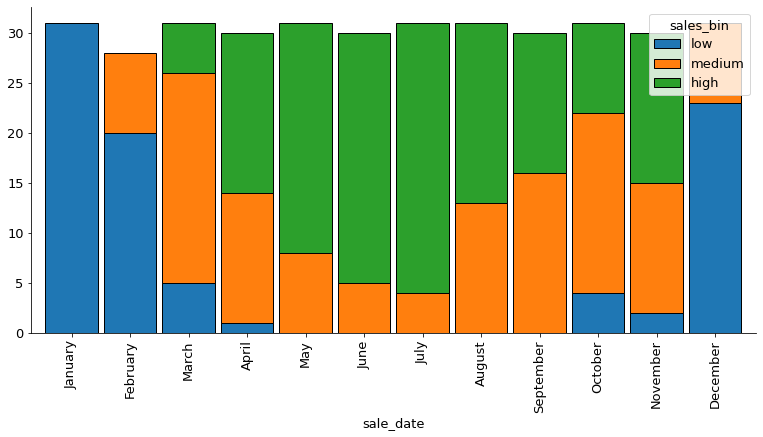

In [37]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

### strftime

A common problem we can run into when visualizing time series data is that the order of the months or days of the week logically is not the same as the order alphabetically. One workaround for this is to format the dates such that the have a number prepended to them (for example, 0-sunday, 1-monday) and the plot. Once the plot is created, we can manipulate the tick labels and remove the prefix. 

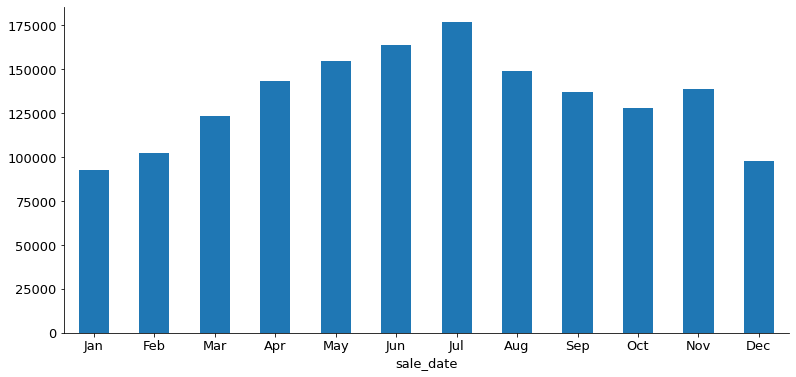

In [38]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

## OPSD

In [39]:
gf = get_germany_power()

In [40]:
gf = prep_opsd(gf)

### Percentage - Based 

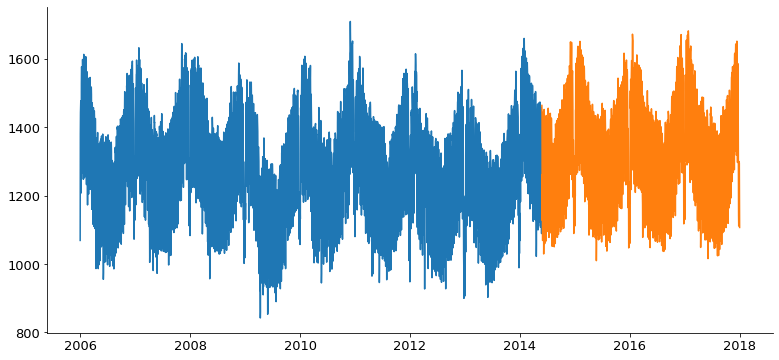

In [41]:
train_size = .70
n = gf.shape[0]
test_start_index = round(train_size * n)

train = gf[:test_start_index] # everything up (not including) to the test_start_index
test = gf[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [42]:
gf.columns=['consumption','wind','solar','wind+solar','month','year']
train.columns=['consumption','wind','solar','wind+solar','month','year']
test.columns=['consumption','wind','solar','wind+solar','month','year']

In [43]:
y=train.consumption

### Histogram to show the distribution of our target variable

<AxesSubplot:ylabel='Frequency'>

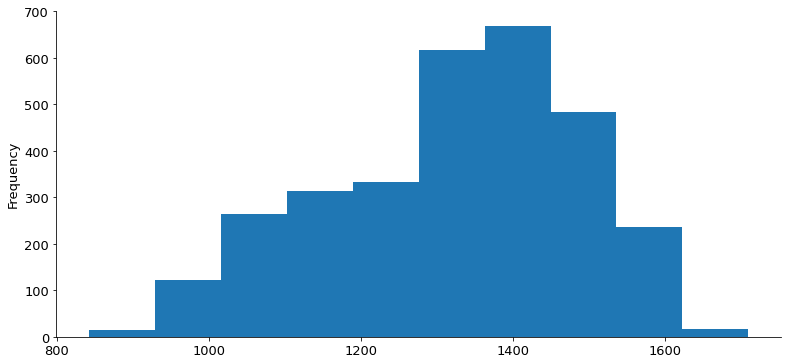

In [44]:
train.consumption.plot.hist()

### We could also treat components of the date as a seperate categorical feature

[Text(0.5, 1.0, 'Average Consumption by Week'),
 Text(0.5, 0, 'week'),
 Text(0, 0.5, 'consumption')]

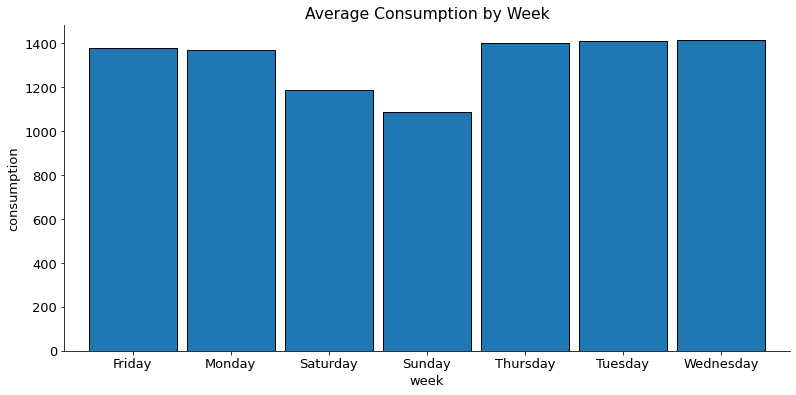

In [45]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Week', xlabel='week', ylabel='consumption')

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'consumption')]

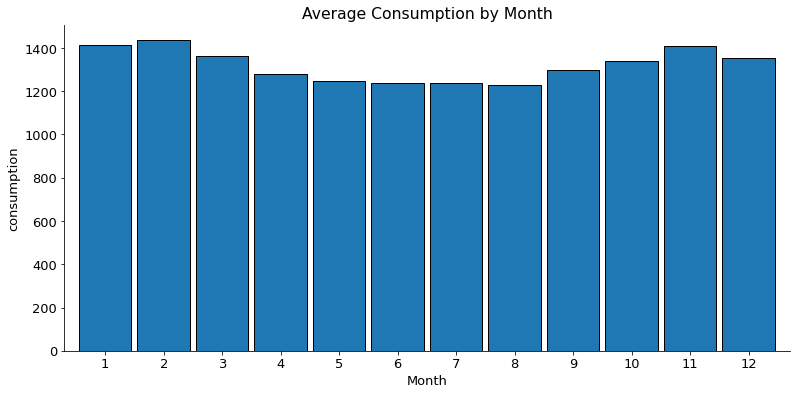

In [46]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='consumption')

[Text(0.5, 1.0, 'Average Consumption by Year'),
 Text(0.5, 0, 'year'),
 Text(0, 0.5, 'consumption')]

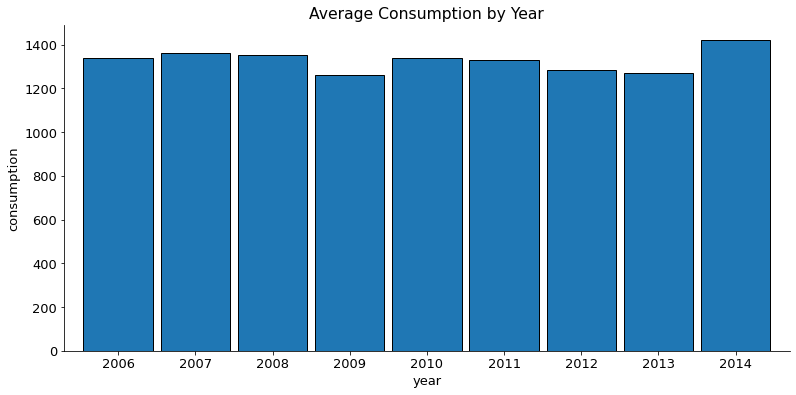

In [47]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Year', xlabel='year', ylabel='consumption')

<AxesSubplot:xlabel='month', ylabel='consumption'>

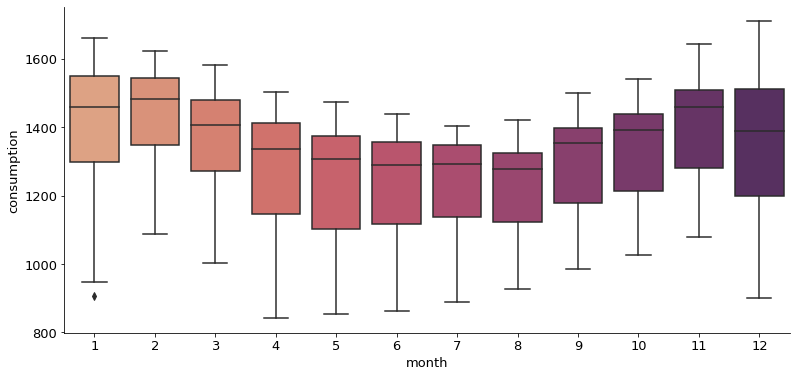

In [48]:
sns.boxplot(data=train, x='month',y='consumption', palette='flare')

### We can also resample our target and visualize it over various time periods. We can combine these visualizations to see how the aggregating smoothes out the data.

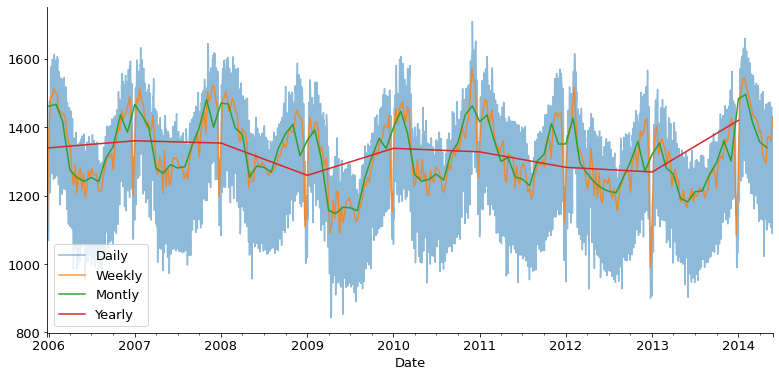

In [49]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### Visualize change over time

<AxesSubplot:title={'center':'Average Month Change in Energy Consumption'}, xlabel='Date'>

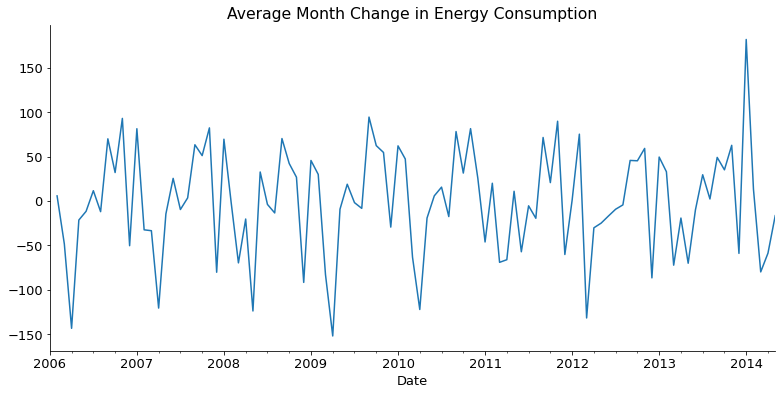

In [50]:
y.resample('M').mean().diff().plot(title='Average Month Change in Energy Consumption')

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

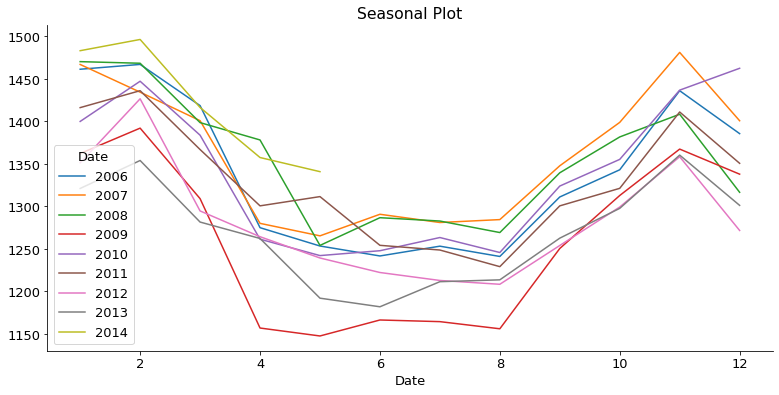

In [51]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

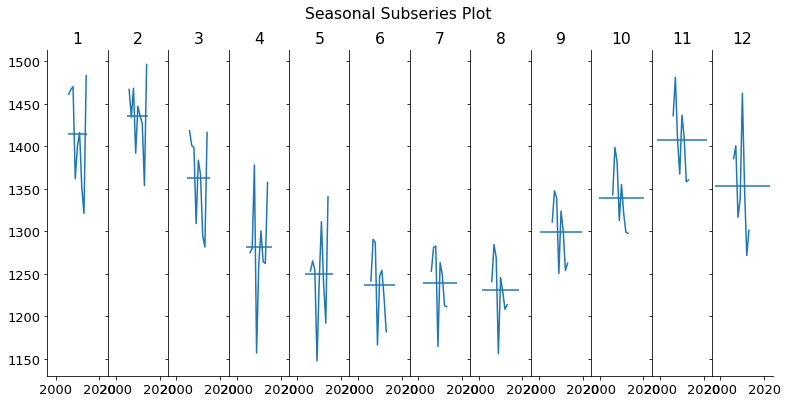

In [52]:

table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Lag Plot 

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

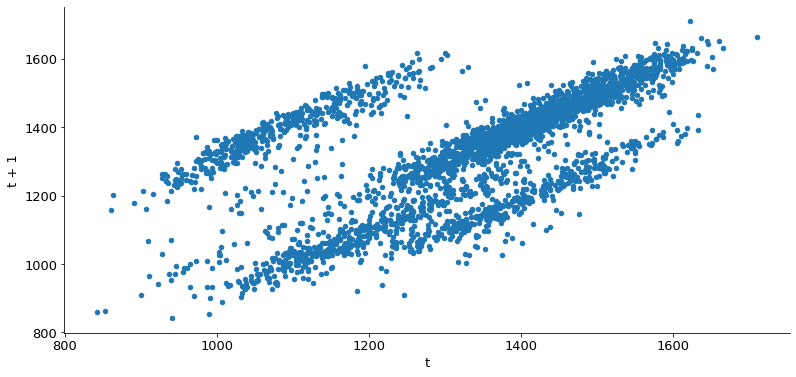

In [53]:
train['y(t + 1)'] = train.consumption.shift(-1)
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

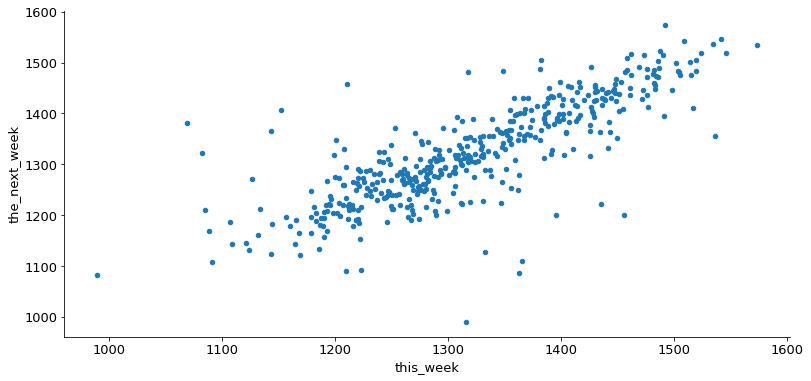

In [54]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

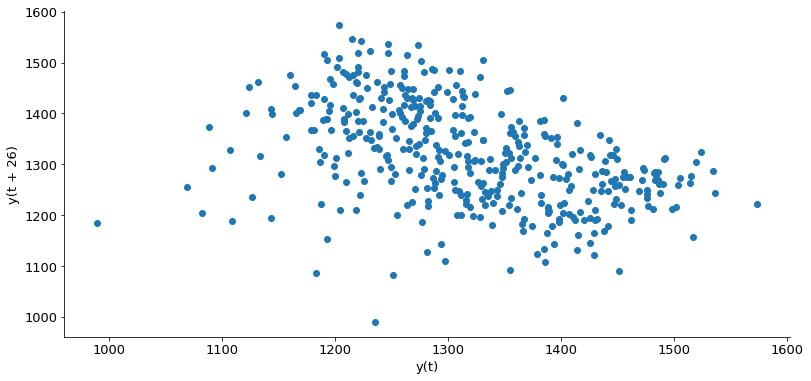

In [55]:
#look into half a year later
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

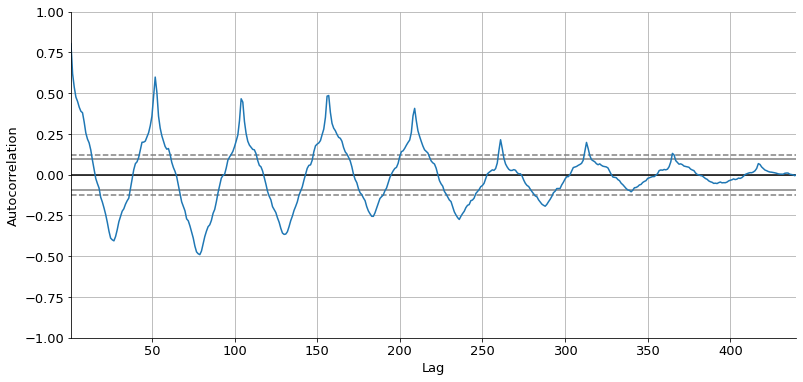

In [56]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

### Seasonal Decomposition

In [57]:
y = train.consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,82.131826,NaN
2006-02-28,1467.106893,NaN,106.938411,NaN
2006-03-31,1418.649161,NaN,32.625533,NaN
2006-04-30,1275.058900,NaN,-42.766287,NaN
2006-05-31,1253.488484,NaN,-78.014809,NaN


<AxesSubplot:xlabel='Date'>

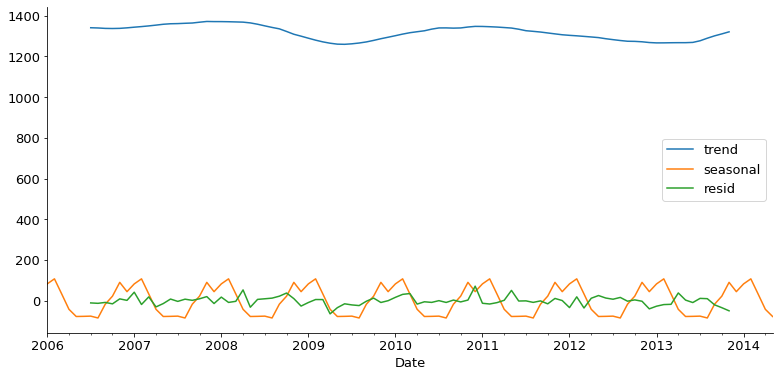

In [58]:

decomposition.iloc[:, 1:].plot()

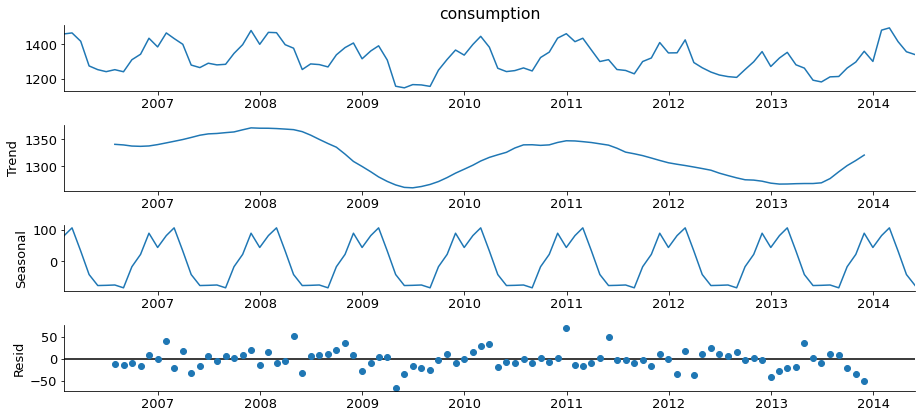

In [59]:
result.plot()
None

### Categories over time

In [60]:
train = train.resample('D').mean()
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.consumption, 3, labels=['low','medium','high'])
train.groupby('consumption_bin').mean()


,consumption,wind,solar,wind+solar,month,year,y(t + 1)
consumption_bin,,,,,,,
low,1125.874587,65.577156,26.331001,69.319043,6.617791,2009.879765,1216.841586
medium,1345.901834,59.831141,29.165084,65.998640,6.452055,2009.715264,1294.959949
high,1493.085339,66.784214,13.010112,46.922207,5.988270,2009.548387,1453.385992


In [61]:

(train.groupby('consumption_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

TypeError: <lambda>() got an unexpected keyword argument 'axis'